## Nearest Neighbor 
# Lorenzo Speri and Carlo Tombolini


In [1]:
# importing the libraries
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from statistics import mode
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

# Exercise 2

The total asymptotic error is:
\begin{align}
    P_{\infty}(error) &=
       = \int _{-\infty}^{+\infty} p_{\infty}(error | X) p(X)\,dX\\
\end{align}
<br>
In the toy example $p(X)=1$ and $P_{\infty}(error|X)=1-(1-x)^2-x^2$.
<br>
Inserting these values on the expression and taking the values of the integral between 0 and 1, we obtain:
$$P_{\infty}(error)=\int _{0}^{1}(1-(1-x)^2-x^2)1\cdot dX=\int _{0}^{1}2(x-x^2)dX=[\, x^2-\frac{2x^2}{3} \,]_{0}^{1}=1-\frac{2}{3}=\frac{1}{3}$$ 

This means that even if we collect an infinite amount of training data, the asymptotic result gives an error rate of 33%,  that is a slight improvement compared to the 35% obtained with a training set of size 2.

# Exercise 3

In [2]:

from sklearn.datasets import load_digits
digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [3]:
# split data
from sklearn import model_selection
X_all = data
y_all = target

X_train , X_test , y_train , y_test =\
model_selection.train_test_split(digits.data, digits.target,\
                  test_size = 0.4, random_state = 0)


Exercise 3.1

In [4]:
# the size of the images is 8x8 pixels 
print("The size of the data is:")
print(np.shape(data))
print("The size of the images is:")
print(np.shape(images))


The size of the data is:
(1797, 64)
The size of the images is:
(1797, 8, 8)


3


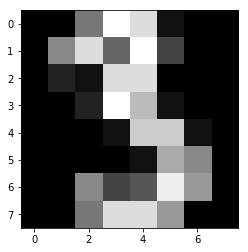

In [5]:
img = images[3,:,:]

print(target_names[3])
assert 2 == len(img.shape)
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest") # also try interpolation="bicubic" 
plt.show()
# visualize three

Exercise 3.2

In [6]:
%%timeit -n 5 -r 1
# distance
import time

def dist_loop(training,test):
    d = np.zeros((len(training),len(test)))
    for n in range(len(training)):
        for m in range(len(test)):
            d[n,m] = np.sqrt(np.sum(np.square(training[n,:]-test[m,:])))
    return d

dist_matrix = dist_loop(X_train, X_test)
print("The shape of the matrix is:")
print(np.shape(dist_matrix))

The shape of the matrix is:
(1078, 719)
The shape of the matrix is:
(1078, 719)
The shape of the matrix is:
(1078, 719)
The shape of the matrix is:
(1078, 719)
The shape of the matrix is:
(1078, 719)
7.26 s ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


In [10]:
def dist_loop(train,test):
    return np.sqrt(np.sum(np.square([i-test for i in train]),2))

Exercise 3.3

In [7]:
%%timeit -n 5 -r 1
# distance vectorized
def dist_loop(train,test):
    return np.sqrt(np.sum(np.square([i-test for i in train]),2))

dist_matrix_v = dist_loop(X_train, X_test)
print("The shape of the matrix is:")
print(np.shape(dist_matrix_v))

The shape of the matrix is:
(1078, 719)
The shape of the matrix is:
(1078, 719)
The shape of the matrix is:
(1078, 719)
The shape of the matrix is:
(1078, 719)
The shape of the matrix is:
(1078, 719)
1.35 s ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


The shapes of the two matrixes are $NxM$ and the the function that has been vectorized is more than 5 times faster than the other one.

Exercise 3.4

In [8]:
# Filtering data
X_train_3 = X_train[np.where(y_train ==3)]
X_test_3 = X_test[np.where(y_test ==3)]
X_train_9 = X_train[np.where(y_train ==9)]
X_test_9 = X_test[np.where(y_test ==9)]
y_train_3_9 = np.concatenate((y_train[np.where(y_train ==3)],y_train[np.where(y_train ==9)]))
y_test_3_9 = np.concatenate((y_test[np.where(y_test ==3)],y_test[np.where(y_test ==9)]))
X_train_3_9 = np.concatenate((X_train_3, X_train_9))
X_test_3_9 = np.concatenate((X_test_3, X_test_9))




In [11]:
# Calculate the distance between train and test
dist_3_9 = dist_loop(X_train_3_9,X_test_3_9)

#Definition of k vector
k = [1, 3, 5, 9, 17, 33]

#Definition of error vector
error = np.zeros(len(k))
print("Different number of neighbors considered:")
print(k)
for i in range(len(k)):
    n_errors = 0
    for j in range(len(X_test_3_9)):
        first_row = dist_3_9[:,j]
        idx = np.argpartition(first_row, k[i])
        if mode(y_train_3_9[idx[:k[i]]])!= y_test_3_9[j]: n_errors += 1

    error[i] = (n_errors/len(X_test_3_9))
print("Error per each value of k considered:")
print(error)

Different number of neighbors considered:
[1, 3, 5, 9, 17, 33]
Error per each value of k considered:
[ 0.01388889  0.00694444  0.00694444  0.00694444  0.00694444  0.02083333]


In [12]:
# k-nearest neighborfunction
def k_NN(x_train, y_train, x_test, k):
    # indeces of the closest instances to the test set
    index = np.argsort(dist_loop(x_train,x_test), axis=0)[:k,:]
    # print(np.shape(index))
    # we take the mode of the k nearest values
    prediction = stats.mode(y_train[index])[0][0]
    return prediction
    
print(sum(k_NN(X_train_3_9, y_train_3_9, X_test_3_9,33)!=y_test_3_9)/len(y_test_3_9))

0.0208333333333


The results for k=33 is the same, using both the function and the code without function.

# Exercise 4

In [13]:
X_3_9_joint = np.concatenate((X_train_3_9, X_test_3_9), axis=0)
y_3_9_joint = np.concatenate((y_train_3_9, y_test_3_9), axis=0)

def split_folds(data, target, L):
    target_vert = np.vstack(target)
    data_permuted = np.random.permutation(np.hstack((data, target_vert)))
    X_folds = np.array_split(data_permuted[:,:64],L, axis = 0)
    Y_folds = np.array_split(data_permuted[:,64],L, axis = 0)

    return X_folds, Y_folds

def error_function(y, f):   return sum((y!=f))/len(y)

# function for the cross validation
# k-nearest neighbor and sklearn
def cross_validation(data, target, L, k):
    # I randomly split the given data and labels into L folds
    X,Y = split_folds(data, target, L)

    # intilize error vectors
    our_error = np.zeros(L)
    sk_error = np.zeros(L)
    
    # I need to change the test set among the different folds
    for j in range(L):
        # training data
        x_train = np.vstack(X[:j] + X[j+1:])
        y_train = np.hstack(Y[:j] + Y[j+1:])
        # test data
        x_test = X[j]
        y_test = Y[j]
        
        # our k_NN classifier  
        our_prediction = k_NN(x_train, y_train, x_test,k)
        
        # sklearn neighbor classifier
        sk=sklearn.neighbors.KNeighborsClassifier(k)
        # train
        sk.fit(x_train,y_train)
        # classify
        sk_prediction = sk.predict(x_test)
        
        # error evaluation of the two algorithms
        our_error[j] = error_function(our_prediction,y_test)
        sk_error[j] = error_function(sk_prediction,y_test)
        
    # statistics
    our_avg_std = np.array([np.mean(our_error), np.std(our_error)])
    sk_avg_std = np.array([np.mean(sk_error), np.std(sk_error)])
        
    return our_avg_std, sk_avg_std
k=3

for L in [2, 5, 10]:
    our_result, sk_result =cross_validation(X_3_9_joint, y_3_9_joint, L, k)
    print('Error rate of our k-NN is %1.3f ± %1.3f  and of sklearn algo is %1.3f ± %1.3f for L =%d'
          %(our_result[0],our_result[1],sk_result[0],sk_result[1],L))



Error rate of our k-NN is 0.019 ± 0.008  and of sklearn algo is 0.019 ± 0.008 for L =2
Error rate of our k-NN is 0.014 ± 0.022  and of sklearn algo is 0.017 ± 0.020 for L =5
Error rate of our k-NN is 0.017 ± 0.022  and of sklearn algo is 0.014 ± 0.019 for L =10
